# A54011_LeeAnna_Big Data Predictive Analytics_Project
## Predictive modeling for house prices in Boston
### Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
> How do home features add up to its price tag?
* This project challenges to predict the final price of each home.
* For each Id in the test set, the value of the SalePrice variable would be predicted.


In [1]:
# Importing packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import sklearn.linear_model as skl_lm
from sklearn import datasets

### Data Load
House_Price_Train.csv

In [2]:
train = pd.read_csv("../Data/House_Price_Train.csv", sep=',')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
type(train)

pandas.core.frame.DataFrame

In [4]:
train.shape

(1460, 81)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# 1. Linear Regression

### Simple Linear Regression
Estimating the Coefficients; Using statsmodel

In [6]:
# GrLivArea: Above grade (ground) living area square feet
lm = smf.ols(formula='SalePrice ~ GrLivArea', data=train).fit()
lm.params

Intercept    18569.025856
GrLivArea      107.130359
dtype: float64

In [7]:
lm.summary()
#F-statistic: 1보다 크므로 관계가 있다.
#R-Squared: 0.5보다 크므로 모델이 적당히 유효하다.
#p-value: 0.05보다 작으므로 관계가 있다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sun, 18 Dec 2016   Prob (F-statistic):          4.52e-223
Time:                        17:22:28   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.000      9779.612  2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000       101.650   112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prediction model1_Simple Linear Regression
Using speicified GrLivArea values for prediction of SalePrice values

In [8]:
# GrLivArea가 1710일때 예측되는 SalePrice값은?
x_new = pd.DataFrame({'GrLivArea': [1710]})
x_new.head()

,GrLivArea
0,1710


In [9]:
lm.predict(x_new)[0]
# ld 1의 SalePrice는 208500이므로 어느정도 차이가 있음

201761.93968804835

In [10]:
salePrice_manual = lm.params.Intercept + lm.params.GrLivArea * 1710
print("Manual Calculation : %6f" % salePrice_manual)

Manual Calculation : 201761.939688


In [11]:
#ld 1,2,3의 SalePrice
X_new = pd.DataFrame({'GrLivArea': [1710, 1262, 1786]})
lm.predict(X_new)

array([ 201761.93968805,  153767.53887136,  209903.84696945])

### Multiple Linear Regression
Using statsmodel; scikit-learn Linear Regression

In [12]:
# OverallQual: Overall material and finish quality
# TotalBsmtSF: Total square feet of basement area
# GarageCars: Size of garage in car capacity
lm_mul = smf.ols(formula='SalePrice ~ GrLivArea + OverallQual + TotalBsmtSF + GarageCars', data=train).fit()
lm_mul.summary()
# R-Squared 값이 이전 모델보다 훨씬 높으므로 Response를 더 잘 예측함

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     1156.
Date:                Sun, 18 Dec 2016   Prob (F-statistic):               0.00
Time:                        17:22:28   Log-Likelihood:                -17500.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1455   BIC:                         3.504e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept   -9.925e+04   4639.866    -21.390      0.000     -1.08e+05 -9.01e+04
GrLivArea      45.6432      2.484     18.376      0.000        40.771    50.515
OverallQual  2.357e+04   1072.465     21.980      0.000      2.15e+04  2.57e+04
TotalBsmtSF    32.5203      2.838     11.459      0.000        26.953    38.087
GarageCars   1.858e+04   1747.412     10.634      0.000      1.52e+04   2.2e+04
==============================================================================
Omnibus:                      421.692   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36798.858
Skew:                          -0.273   Prob(JB):                         0.00
Kurtosis:                      27.589   Cond. No.                     8.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prediction model2_Multiple Linear Regression
Adding different features' values for SalePrice prediction

In [13]:
x_new2 = pd.DataFrame({'GrLivArea': [1710], 'OverallQual': [7], 'TotalBsmtSF': [856], 'GarageCars': [2]})
x_new2.head()

,GarageCars,GrLivArea,OverallQual,TotalBsmtSF
0,2,1710,7,856


In [14]:
lm_mul.predict(x_new2)[0]
#ld 1의 SalePrice는 208500이므로 model1에 비해 차이가 많이 줄어듬

208808.41328370001

In [15]:
#ld 1,2,3의 SalePrice
X_new2 = pd.DataFrame({'GrLivArea': [1710,1262,1786], 'OverallQual': [7,6,7], 'TotalBsmtSF': [856,1262,920], 'GarageCars': [2,2,2]})
lm_mul.predict(X_new2)
#ld 2's SalePrice: 181500, ld 3's SalePrice: 223500이므로 Simple Linear Regression 모델보다 예측능력이 훨씬 좋음

array([ 208808.4132837 ,  177991.30234567,  214358.59446741])

### Interaction Terms
Checking whether two predictors interact

In [16]:
# YearBuilt: Original construction date
lm_interact = smf.ols('SalePrice ~ OverallQual + YearBuilt + OverallQual:YearBuilt', train).fit()
lm_interact.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,2.564e+06,3.81e+05,6.724,0.000,1.82e+06 3.31e+06
OverallQual,-4.783e+05,6.05e+04,-7.912,0.000,-5.97e+05 -3.6e+05
YearBuilt,-1340.1264,194.038,-6.907,0.000,-1720.751 -959.502
OverallQual:YearBuilt,263.6739,30.629,8.609,0.000,203.592 323.756


In [17]:
smf.ols('SalePrice ~ OverallQual*YearBuilt', train).fit().summary()
# OverallQual와 YearBuilt 사이에 시너지 효과가 있다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     904.3
Date:                Sun, 18 Dec 2016   Prob (F-statistic):               0.00
Time:                        17:22:28   Log-Likelihood:                -17776.
No. Observations:                1460   AIC:                         3.556e+04
Df Residuals:                    1456   BIC:                         3.558e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept              2.564e+06   3.81e+05      6.724      0.000      1.82e+06  3.31e+06
OverallQual           -4.783e+05   6.05e+04     -7.912      0.000     -5.97e+05  -3.6e+05
YearBuilt             -1340.1264    194.038     -6.907      0.000     -1720.751  -959.502
OverallQual:YearBuilt   263.6739     30.629      8.609      0.000       203.592   323.756
==============================================================================
Omnibus:                      618.099   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6633.870
Skew:                           1.672   Prob(JB):                         0.00
Kurtosis:                      12.893   Cond. No.                     3.93e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prediction model3_Interaction effect

In [18]:
#ld 1, 2, 3
test = pd.DataFrame({'OverallQual': [7,6,7], 'YearBuilt': [2003,1976,2001]})
test

,OverallQual,YearBuilt
0,7,2003
1,6,1976
2,7,2001


In [19]:
lm_interact.predict(exog=test)

array([ 227980.91570885,  171652.24589486,  226969.73426772])

### Prediction model4_scikit-learn Linear Regression

In [20]:
# 1) estimator를 import
from sklearn.linear_model import LinearRegression

In [21]:
X = train.loc[:, ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars']]
y = train.SalePrice
print(X.head(), '\n')
print(X.values[:5], '\n')
print(type(X.values))

   GrLivArea  OverallQual  TotalBsmtSF  GarageCars
0       1710            7          856           2
1       1262            6         1262           2
2       1786            7          920           2
3       1717            7          756           3
4       2198            8         1145           3 

[[1710    7  856    2]
 [1262    6 1262    2]
 [1786    7  920    2]
 [1717    7  756    3]
 [2198    8 1145    3]] 

<class 'numpy.ndarray'>


In [22]:
X.shape , X.values.shape

((1460, 4), (1460, 4))

In [23]:
type(y)

pandas.core.series.Series

In [24]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [25]:
y.values

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [26]:
type(y.values)

numpy.ndarray

In [27]:
y.values[:5]

array([208500, 181500, 223500, 140000, 250000], dtype=int64)

In [28]:
y.shape , y.values.shape

((1460,), (1460,))

In [29]:
# 2) Estimator를 instantiate
model = LinearRegression()

In [30]:
# 3) Estimator 훈련
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
# 학습된 Estimator 살펴보기
print(model.coef_)
list(zip(X.columns, model.coef_))

[    45.64315247  23572.23563223     32.52033744  18582.20858995]


[('GrLivArea', 45.643152468719904),
 ('OverallQual', 23572.235632229833),
 ('TotalBsmtSF', 32.520337438891964),
 ('GarageCars', 18582.20858995062)]

In [32]:
model.intercept_

-99248.852891015908

In [33]:
model.score(X, y, sample_weight=None)

0.76066818876041309

In [34]:
# 4) Predict: response 추정
y_pred = model.predict(X)
pd.DataFrame({'y_True' : y, "y_pred": y_pred}).head(10)

,y_True,y_pred
0,208500,208808.413284
1,181500,177991.302346
2,223500,214358.594467
3,140000,224458.090197
4,250000,282635.093430
5,143000,143828.904714
6,307000,258642.238551
7,200000,234315.415919
8,129900,214851.527436
9,118000,118579.863471


In [35]:
X.tail()

,GrLivArea,OverallQual,TotalBsmtSF,GarageCars
1455,1647,6,953,2
1456,2073,6,1542,2
1457,2340,7,1152,1
1458,1078,5,1078,1
1459,1256,5,1256,1


In [36]:
X.values[-5:]

array([[1647,    6,  953,    2],
       [2073,    6, 1542,    2],
       [2340,    7, 1152,    1],
       [1078,    5, 1078,    1],
       [1256,    5, 1256,    1]], dtype=int64)

In [37]:
y_pred = model.predict(X)
pd.DataFrame({'y_True' : y, "y_pred": y_pred}).tail(5)

,y_True,y_pred
1455,175000,185515.131778
1456,210000,224113.593481
1457,266500,228607.410631
1458,142125,121454.775980
1459,147500,135367.877184


In [38]:
# 새로운 feature에 대한 response 추정; ld 1462
X_new = pd.DataFrame([[1329, 5, 882, 1]])
model.predict(X_new)

array([ 126537.22111212])

In [39]:
X_new = ([[1329, 5, 882, 1]])
model.predict(X_new)

array([ 126537.22111212])

In [40]:
# Feature array 적용; ld 1462, 1463, 1464
X_new = pd.DataFrame({'GrLivArea': [1329,1629,1604], 'OverallQual': [6,5,6], 'TotalBsmtSF': [1329,928,926], 'GarageCars': [1,2,2]})

In [41]:
X.columns

Index(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars'], dtype='object')

In [42]:
X_new = X_new[X.columns]
X_new.values

array([[1329,    6, 1329,    1],
       [1629,    5,  928,    2],
       [1604,    6,  926,    2]], dtype=int64)

In [43]:
model.predict(X_new)

array([ 164646.04757953,  160308.31096487,  182674.4271105 ])

# 2. Tree based Methods

In [44]:
# Importing packages
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics

%matplotlib inline
plt.style.use('seaborn-white')

In [45]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image

def show_tree(decision_tree, feature_names=None, class_names=None):
    dot_data = StringIO()
    tree.export_graphviz(decision_tree, out_file=dot_data, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

### Decision Tree
Regression Tree & Cross Validation

In [46]:
# Small regression tree
X = train.loc[:,['OverallQual', 'YearBuilt']] # Both are numeric
Y = train.SalePrice

reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=7) # Instantiate regression tree
reg_tree.fit(X,y) # train with all samples

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=7, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

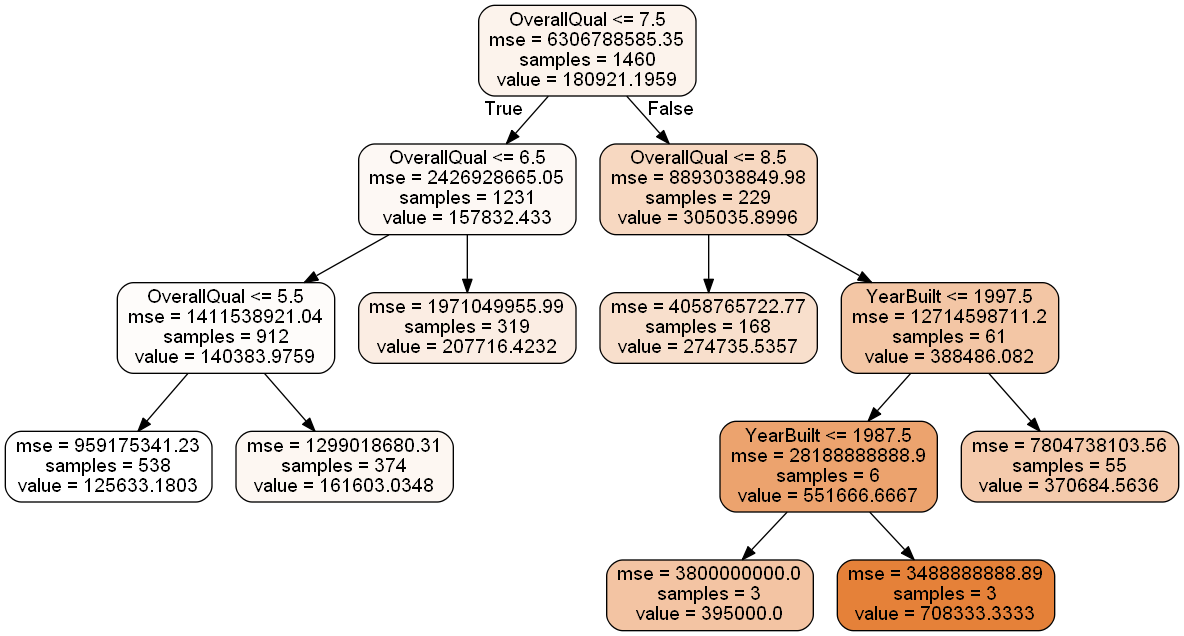

In [47]:
graph = show_tree(reg_tree, feature_names=list(X.columns))
Image(graph.create_png())
# Graphviz2.38 has been installed beforehand

In [48]:
cols_to_drop = ['Id','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType', 'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
# To replace the NaN values with the mean
train = train.fillna(train.mean())

# train 데이터 중에 qualitative 변수가 있으므로 이를 dummy encoding & categorical Predictors를 제거 
train_enc = pd.get_dummies(train.drop(cols_to_drop, axis=1), drop_first=True)

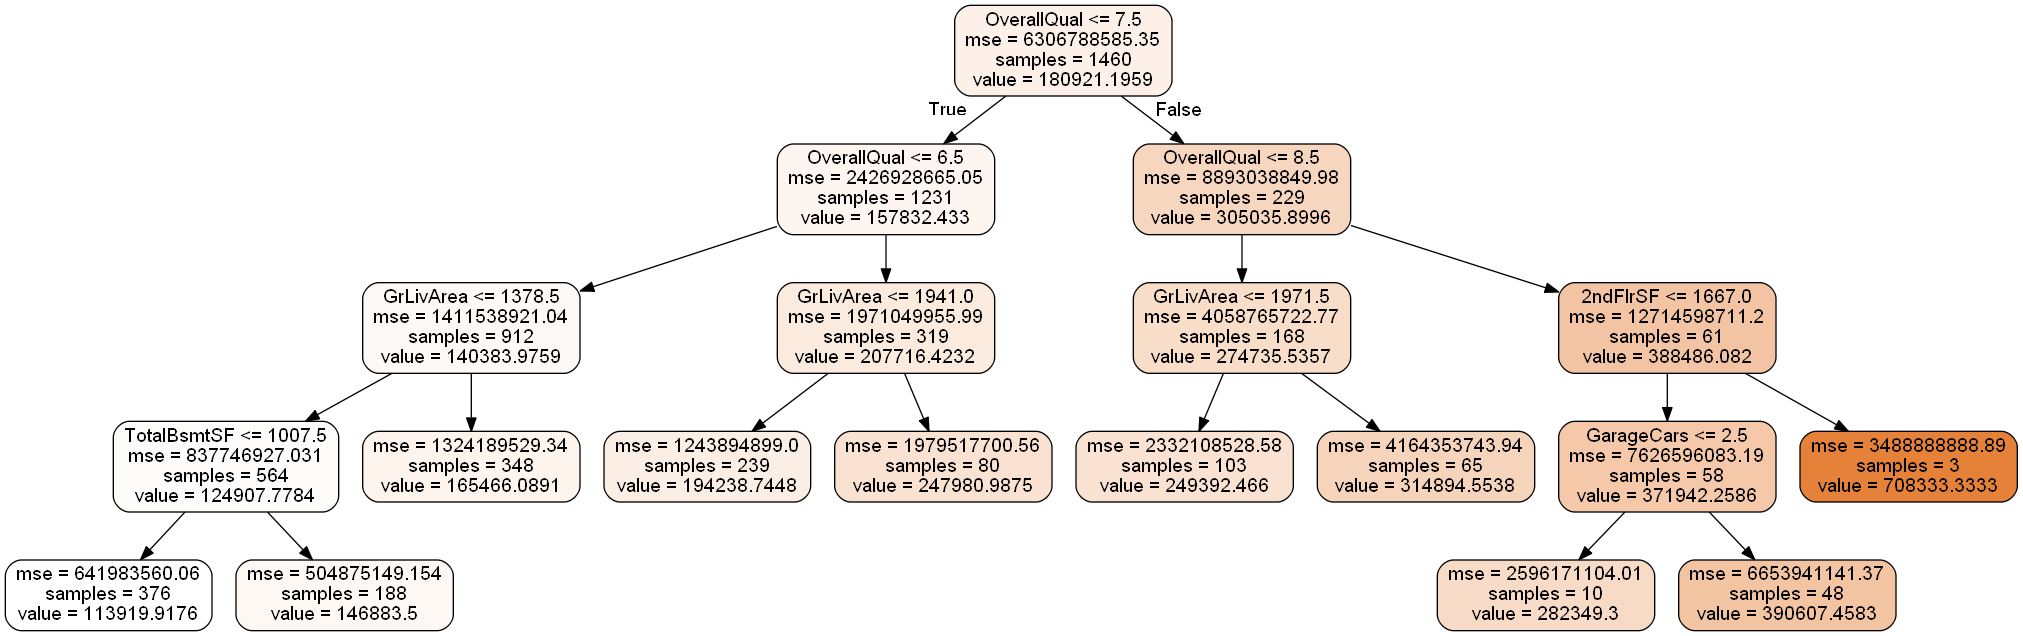

In [49]:
# 모든 observation 활용 
X = train_enc.drop('SalePrice', axis=1)
y = train_enc.SalePrice

reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=10)
reg_tree.fit(X, y)
graph = show_tree(reg_tree, feature_names=list(X.columns))
Image(graph.create_png())

### K-Fold Cross Validation

best tree size =  9


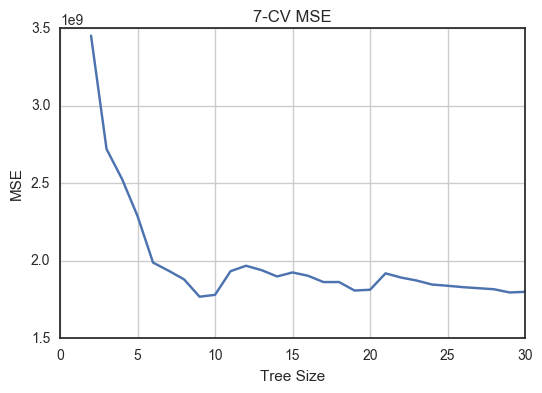

In [50]:
# Cross-Validation을 사용해 어떤 크기의 tree가 가장 좋은 test performance를 보일까 알아 봄
# Estimating the best terminal nodes regression tree using Cross-Validation

tree_sizes = range(2, 31)

MSE_scores = []

# 7-Fold CV for each tree size 
for size in tree_sizes:
    reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=size, random_state=123)
    MSE_s = -cross_val_score(reg_tree, X, y, cv=7, scoring='mean_squared_error')
    MSE_scores.append(np.mean(MSE_s))
    
# plot CV-MSE as tree size gets bigger 
plt.plot(tree_sizes, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)

print("best tree size = ", tree_sizes[np.argmin(MSE_scores)])

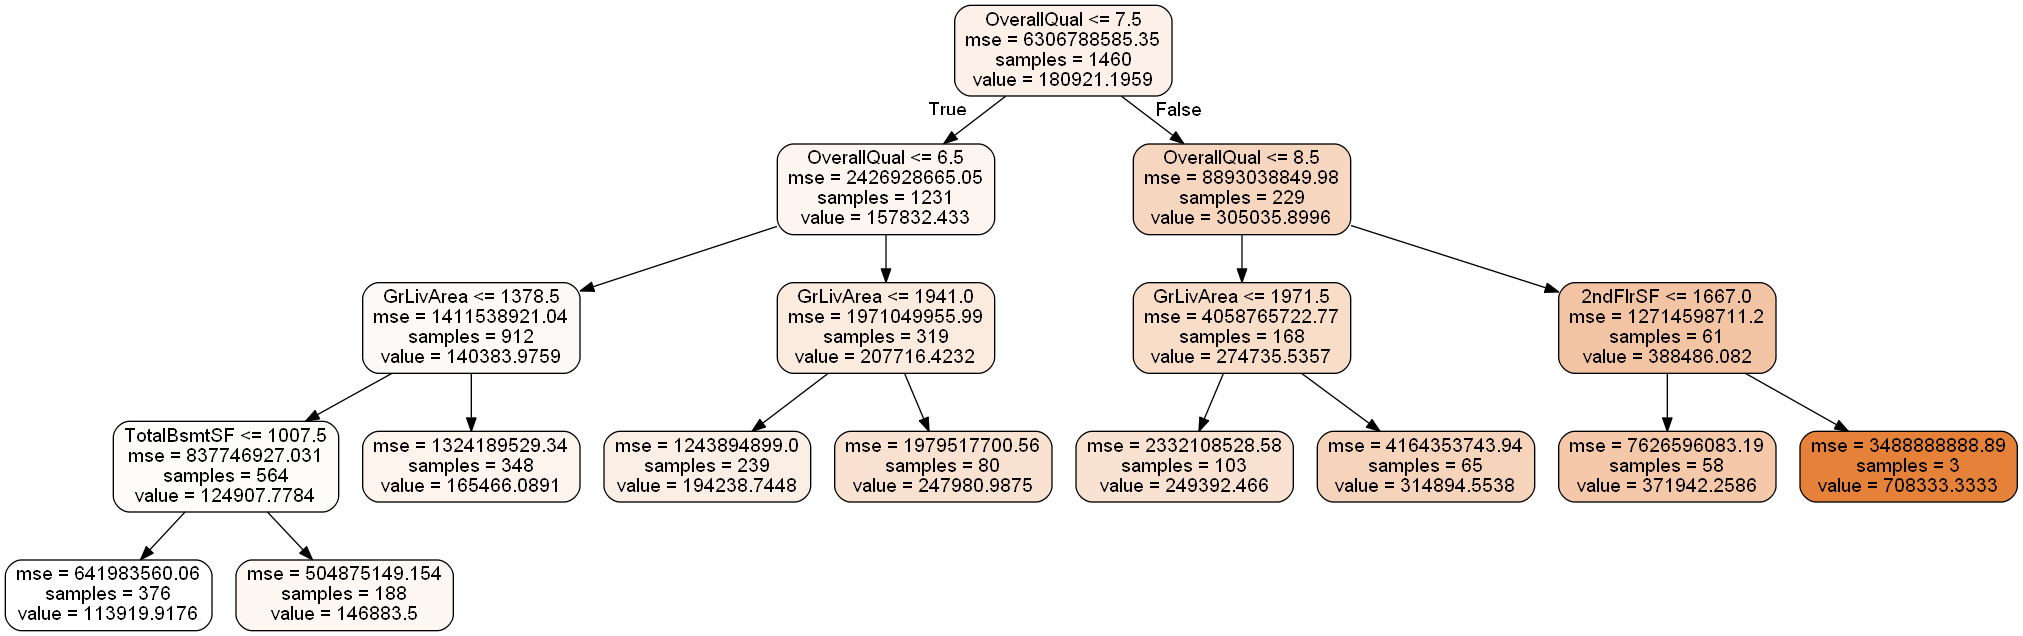

In [51]:
# display the 9 leaves tree 
reg_tree_best = tree.DecisionTreeRegressor(max_leaf_nodes=9, random_state=1)
reg_tree_best.fit(X, y)
graph = show_tree(reg_tree_best, feature_names=list(X.columns))
Image(graph.create_png())

In [52]:
# Print the important features 
feature_importance=pd.DataFrame({'feature':X.columns, 'importance':reg_tree_best.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
3,OverallQual,0.834501
14,GrLivArea,0.099852
12,2ndFlrSF,0.046168
10,TotalBsmtSF,0.019479
0,MSSubClass,0.000000
22,Fireplaces,0.000000
23,GarageYrBlt,0.000000
24,GarageCars,0.000000
25,GarageArea,0.000000
26,WoodDeckSF,0.000000


### Prediction model5_Regession Tree
Predicting SalePrice after pruning

In [53]:
#  Terminal node의 개수가 9개인 tree 만듬
reg_tree_best = tree.DecisionTreeClassifier(max_leaf_nodes=9, random_state=1)
reg_tree_best.fit(X, y)  # Use all the samples 

# Let's generate a little test set 
X_test = X.sample(5, random_state=123)
X_test.OverallQual = [7, 6, 7, 7, 8]   # alter a little 
X_test.GrLivArea = [1710, 1262, 1786, 1717, 2198]
X_test.TotalBsmtSF = [856, 1262, 920, 756, 1145]
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
147,60,70.049958,9505,7,5,2001,2001,0,0,884,...,434,144,48,0,0,0,0,0,5,2010
676,70,60.000000,9600,6,2,1900,1950,0,0,1095,...,779,0,0,90,0,0,0,0,5,2006
1304,160,32.000000,3363,7,5,2004,2004,0,0,976,...,380,0,40,0,0,0,0,0,4,2006
1372,60,75.000000,9750,7,6,1998,1998,975,0,133,...,583,253,170,0,0,0,0,0,6,2006
1427,50,60.000000,10930,8,6,1945,1950,580,0,333,...,288,0,0,0,0,0,0,0,4,2008


In [54]:
# Predict on X_test 
pd.Series(reg_tree_best.predict(X_test))

0    180000
1    185000
2    130000
3    180000
4    140000
dtype: int64

### Random Forests
Random Forest Regression; Cross Validation

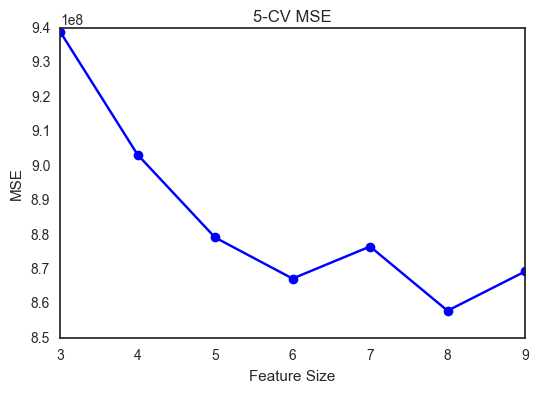

In [55]:
# Import Random Forest estimator
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

feature_sizes = range(3, 10)
MSE_scores = []

# 7-Fold CV for each tree  
for size in feature_sizes:
    RF_regressor1 = RandomForestRegressor(n_estimators=500, max_features=size, random_state=123, n_jobs=-1)
    MSE_s = -cross_val_score(RF_regressor1, X, y, cv=5, scoring='mean_squared_error', n_jobs=-1)
    MSE_scores.append(np.mean(MSE_s))
    
# plot CV-MSE as tree size gets bigger 
plt.plot(feature_sizes, MSE_scores, 'bo-')
plt.title('5-CV MSE')
plt.xlabel('Feature Size')
plt.ylabel('MSE')

### Validation Set Approach (Train/Test Split)

In [56]:
# train/test split으로 test performance 추정
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

# tree를 500개, split할 때 8개 feature 중에서 선택 
RF_regressor = RandomForestRegressor(n_estimators=500, max_features=8, random_state=123) # Recommended feature size=8 

# Training set으로 RF regressor 학습 
RF_regressor.fit(X_train, y_train)

# Test with Test Set
y_pred = RF_regressor.predict(X_test)
print("MSE = ", metrics.mean_squared_error(y_test, y_pred) )

Importance=pd.DataFrame({'feature':X.columns, 'importance':RF_regressor.feature_importances_}).sort_values(
    by='importance', ascending=True)
Importance

MSE =  864046097.078


,feature,importance
31,PoolArea,0.000035
29,3SsnPorch,0.000160
32,MiscVal,0.000260
13,LowQualFinSF,0.000321
28,EnclosedPorch,0.001355
8,BsmtFinSF2,0.001424
20,KitchenAbvGr,0.001861
16,BsmtHalfBath,0.002247
15,BsmtFullBath,0.002568
34,YrSold,0.003996


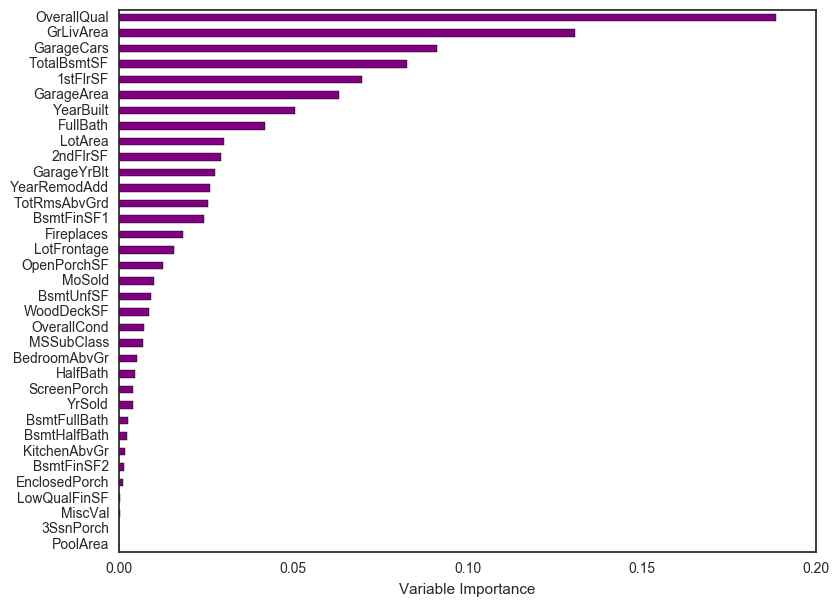

In [57]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9,7)) 

Importance.plot(kind='barh', color='Purple', ax=ax1)
y_pos = np.arange(len(Importance))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.yticks(y_pos, Importance.feature)
plt.show()

### Prediction model6_Random Forest

In [58]:
reg_tree_best = RandomForestClassifier(n_estimators=500, max_features=2, criterion='entropy', random_state=123, n_jobs=-1)
reg_tree_best.fit(X, y)

# Training set으로 예측해 보기  : 샘플들을 다 맞춤 
X_train = X.sample(10, random_state=12)
y_train = y.sample(10, random_state=12)
y_train_pred = reg_tree_best.predict(X_train)
print("Training Set 예측 예 : ")
print( pd.DataFrame(list(zip(y_train, y_train_pred)), columns=['actual', 'prediction']) )

# Test set을 만들자 
X_test = X.sample(10, random_state=123)

# The following is not the same as 'sklearn.utils.shuffle'. 
# while 'sklearn.utils.shuffle' shuffles the rows, 'shuffle_DF' shuffles the values and leaves
# the row index (order) intact
def shuffle_DF(DF, n=1, axis=0):  # axis=0 : column별로 column value 들을 shuffle   
    df_val = DF.values
    for _ in range(n):
        df_val = np.apply_along_axis(np.random.permutation, axis=axis, arr=df_val)
    
    shuffled_DF = pd.DataFrame(df_val, index=DF.index, columns=DF.columns)
    return( shuffled_DF )

X_test = shuffle_DF(X_test)
print("\nTest Set:\n", X_test)
print("\nTest Response 예측:\n", list(zip(X_test.index, reg_tree_best.predict(X_test) ) ) )

Training Set 예측 예 : 
   actual  prediction
0  245500      245500
1  275000      275000
2  165600      165600
3  119500      119500
4  171000      171000
5  269500      269500
6  153900      153900
7  207000      207000
8  212000      212000
9  294000      294000

Test Set:
       MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
147         20.0    80.000000   9505.0          5.0          5.0     1900.0   
676         60.0    32.000000  13418.0          5.0          5.0     2004.0   
1304        50.0    70.000000   9400.0          7.0          6.0     1998.0   
1372        20.0    70.049958   8402.0          4.0          2.0     2007.0   
1427        70.0    75.000000   9750.0          6.0          6.0     2004.0   
1127        20.0   108.000000   8700.0          7.0          5.0     1945.0   
35          90.0    60.000000   3363.0          5.0          5.0     2001.0   
954        160.0    35.000000   9600.0          8.0          5.0     1975.0   
1296        60

### Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.utils import shuffle

# train/test split 방법으로 test error 추정
X = train_enc.drop('SalePrice', axis=1)
y = train_enc.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=1234)  #train:test = 9:1 

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 1, 'max_features': 'sqrt', 'subsample' : 0.9,
          'learning_rate': 0.01, 'loss': 'ls', 'random_state': 1}

# Grandient Boosting regressor를 만들고 학습 
GRB_reg = GradientBoostingRegressor(**params)
GRB_reg.fit(X_train, y_train)

mse = metrics.mean_squared_error(y_test, GRB_reg.predict(X_test))
print("Train/Test Split MSE: %.4f" % mse)

Train/Test Split MSE: 688469673.4848


Train/Test Split GBR with 500 estimators: 688469673.4848


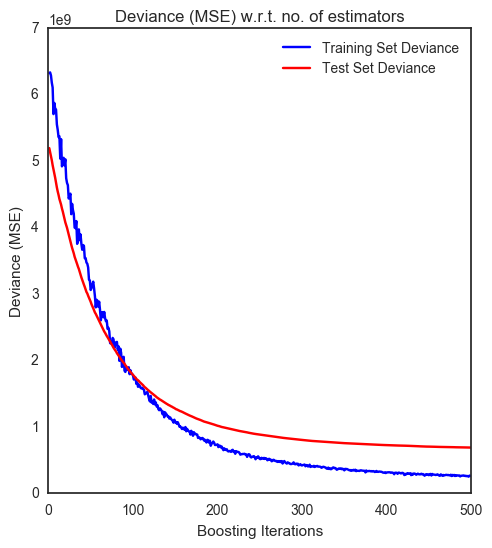

In [60]:
# 차례로 tree들을 만들어 갈 때 GB Regression Tree의 성능 (least squares error/MSE)이 어떻게 변화하는 지 모니터
# 계속 train/test 사용
# test score를 담을 크기의 그릇을 미리 만듬면 append() 같이 느릔 operation 안써도 됨 
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

# compute test set deviance
for i, y_pred in enumerate(GRB_reg.staged_predict(X_test)):   # 'staged_predict' 참고 
    test_score[i] = GRB_reg.loss_(y_test, y_pred)              # 'loss_' 참고 

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance (MSE) w.r.t. no. of estimators')
plt.plot(np.arange(params['n_estimators']) + 1, GRB_reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance (MSE)')
print("Train/Test Split GBR with 500 estimators: %.4f" % test_score[-1])
# Training set 에러는 예상대로 tree가 증가할 수록 작아짐. Test error 추정도 500 정도까지도 조금씩 작아짐

In [61]:
# GBR의 parameter를 앞의 것과 그대로 하고 tree 개수(즉, iteration 수)를 1000으로 하여 cross-validation을 통해 보다 믿음직한 MSE를 추정해 보면,
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 1, 'max_features': 'sqrt', 'subsample' : 0.9,
          'learning_rate': 0.01, 'loss': 'ls',  'random_state': 1}

GRB_reg = GradientBoostingRegressor(**params)

X, y = shuffle(X, y, random_state=123)   # Let's shuffle before going into CV
MSE_s = -cross_val_score(GRB_reg, X, y, cv=10, scoring='mean_squared_error')

print("1000 iterations 10-CV MSE: %.4f" % np.mean(MSE_s) )
# 앞서 같은 데이터에 최적의 tree (terminal node 수 = 8) 일 때의 CV-MSE 이나 Random Forest가 보여준 CV-MSE 에 비해
# Boosting Regressor의 성능 CV-MSE 이 나음을 알 수 있다.

1000 iterations 10-CV MSE: 731305214.7888


Minimun MSE:850502453.6904 when n_estimators=1100


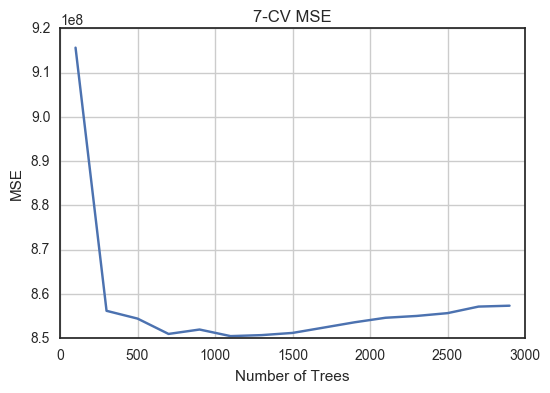

In [62]:
# Boosting 방법이 iteration이 지나치면 overfit도 하기에 n_estimator 패러미터를 변경하며 cross-validation 하면 Overfit을 하지만 그 정도가 매우 미미함
tree_sizes = list(range(100, 3001, 200))
X, y = shuffle(X, y, random_state=123)   # Let's shuffle before going into CV
MSE_scores = []

for size in tree_sizes:
    GRB_reg1 = GradientBoostingRegressor(n_estimators=size, max_depth=3, min_samples_split=1, max_features='sqrt', subsample=0.9,
                                         learning_rate=0.05, loss='ls', random_state=1)
    MSE_s = -cross_val_score(GRB_reg1, X, y, cv=7, scoring='mean_squared_error', n_jobs=-1)
    MSE_scores.append(np.mean(MSE_s))
    
plt.plot(tree_sizes, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Number of Trees')
plt.ylabel('MSE') 
plt.grid(True)

print("Minimun MSE:%.4f when n_estimators=%d" % (np.min(MSE_scores), tree_sizes[np.argmin(MSE_scores)] ))  

### Prediction model7_Gradient Boosting

In [63]:
X_test = shuffle_DF(X.sample(10, random_state=1))  # generate arbitrary test set 

params = {'n_estimators': 1100, 'max_depth': 3, 'min_samples_split': 1, 'max_features': 'sqrt', 'subsample' : 0.9,
          'learning_rate': 0.05, 'loss': 'ls',  'random_state': 1}

GRB_reg_x = GradientBoostingRegressor(**params)
GRB_reg_x.fit(X,y)

# prediction 결과 출력 
pd.DataFrame(GRB_reg_x.predict(X_test), index=X_test.index, columns=['prediction'])

# Boosting prediction이 Random Forest보다 훨씬 훌륭함

,prediction
329,176628.088159
301,218288.333129
508,195342.721490
1149,138132.793703
1311,129495.975473
1022,207739.069484
569,143255.805966
1051,167097.422089
1095,233035.631596
1373,223826.938652


# Result
For the test dataset

Performance가 나은 Multiple Linear Regression과 Boosting을 이용하여 Test의 SalePrice 예측

### Data Load
House_Price_Test.csv

In [64]:
test = pd.read_csv("../Data/House_Price_Test.csv", sep=',')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 1. Multiple Linear Regression
중요 predictors 4개 사용

In [65]:
X = test.loc[:, ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars']]
print(X.head(), '\n')
print(X.values[:5], '\n')
print(type(X.values))

   GrLivArea  OverallQual  TotalBsmtSF  GarageCars
0        896            5        882.0         1.0
1       1329            6       1329.0         1.0
2       1629            5        928.0         2.0
3       1604            6        926.0         2.0
4       1280            8       1280.0         2.0 

[[  8.96000000e+02   5.00000000e+00   8.82000000e+02   1.00000000e+00]
 [  1.32900000e+03   6.00000000e+00   1.32900000e+03   1.00000000e+00]
 [  1.62900000e+03   5.00000000e+00   9.28000000e+02   2.00000000e+00]
 [  1.60400000e+03   6.00000000e+00   9.26000000e+02   2.00000000e+00]
 [  1.28000000e+03   8.00000000e+00   1.28000000e+03   2.00000000e+00]] 

<class 'numpy.ndarray'>


In [66]:
lm_mul.predict(X)

array([ 106773.73609316,  164646.04757953,  160308.31096487, ...,
        151448.85409695,   92544.73090906,  245179.98333102])

In [67]:
y_pred = lm_mul.predict(X)
Id = test.Id[:1457]
pd.DataFrame({'Id' : Id, 'SalePrice': y_pred})

,Id,SalePrice
0,1461,106773.736093
1,1462,164646.047580
2,1463,160308.310965
3,1464,182674.427111
4,1465,226542.716428
5,1466,179701.412884
6,1467,171511.154191
7,1468,171874.742688
8,1469,206405.119846
9,1470,101144.704916


### 2. Gradient Boosting
Qualitative data 제외한 모든 predictors 및 observation 사용

In [68]:
cols_to_drop = ['Id','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType', 'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
# To replace the NaN values with the mean
test = test.fillna(test.mean())

# train 데이터 중에 qualitative 변수가 있으므로 이를 dummy encoding & categorical predictors를 제거 
test_enc = pd.get_dummies(test.drop(cols_to_drop, axis=1), drop_first=True)

In [69]:
X = test_enc
y = GRB_reg_x.predict(X)

Id = test.Id[:1459]
# prediction 결과 출력 
pd.DataFrame({'Id' : Id, 'SalePrice': y})

,Id,SalePrice
0,1461,129095.190061
1,1462,159927.731693
2,1463,190196.110106
3,1464,195271.190833
4,1465,181395.607723
5,1466,174062.979140
6,1467,188615.549441
7,1468,168357.614771
8,1469,170486.726063
9,1470,121862.553095
